<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html).

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.pipeline import Pipeline

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [3]:
# A:
df.drop(columns = ['Unnamed: 0', 'Pu238', 'Pu241'], inplace=True)
df.head()

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


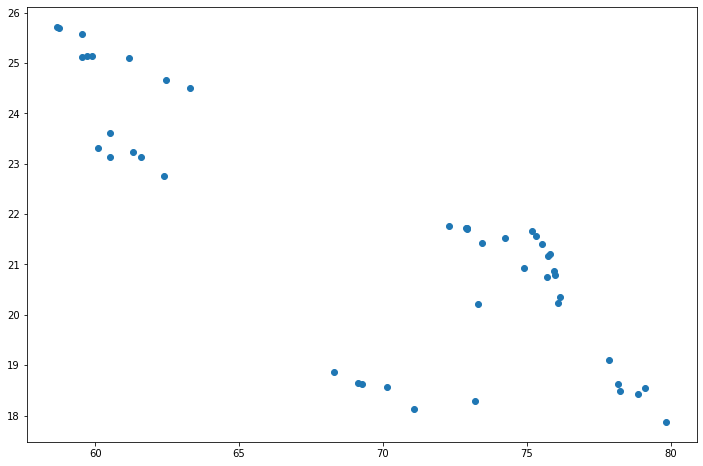

In [4]:
plt.figure(figsize=(12,8))
plt.scatter( df['Pu239'], df['Pu240']);

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [5]:
# A:
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

### Assign clusters assignments (predictions) back to the original dataframe

In [6]:
# A: 
df.loc[:, 'cluster'] = km.predict(df)

In [7]:
df.head()

,Pu239,Pu240,cluster
0,75.804,21.204,0
1,75.515,21.408,0
2,75.175,21.668,0
3,78.872,18.428,0
4,73.317,20.223,2


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

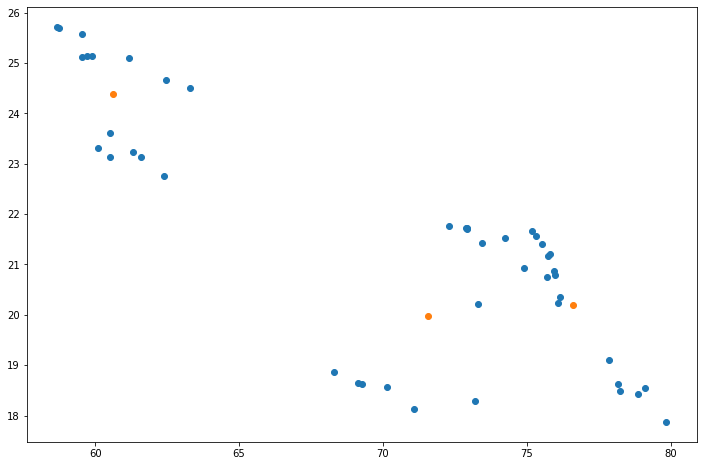

In [8]:
# A:
plt.figure(figsize=(12,8))

plt.scatter( x= df['Pu239'], y= df['Pu240'])


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1])

plt.show()


### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [40]:
df_copy = df.drop(columns='cluster')

In [46]:
sc = StandardScaler()
X = df_copy[['Pu239', 'Pu240']]
# print(X)
X_scaled = sc.fit_transform(X)
# x_col = sc.fit(df_copy['Pu239'])
# y_col = sc.fit(df_copy['Pu240'])

In [47]:
km = KMeans(n_clusters=3)
km.fit(X_scaled)

df_copy.loc[:, 'cluster'] = km.predict(X_scaled)

In [48]:
df_copy.head()

,Pu239,Pu240,cluster
0,75.804,21.204,0
1,75.515,21.408,0
2,75.175,21.668,0
3,78.872,18.428,2
4,73.317,20.223,0


In [55]:
pluto = pd.DataFrame(X_scaled, columns=['Pu239', 'Pu240'])

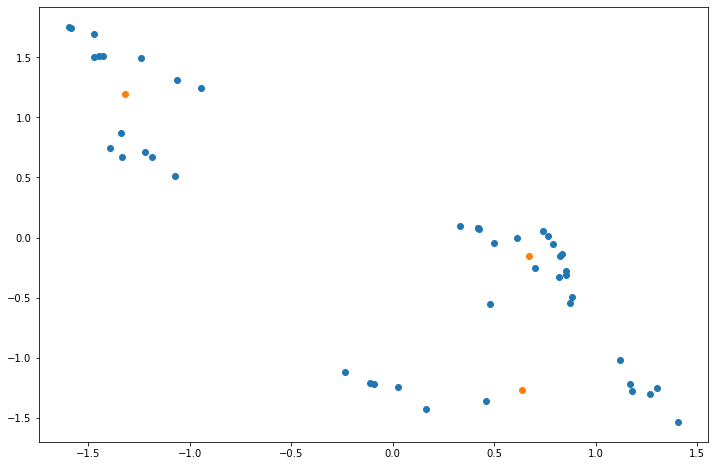

In [56]:
# A:
plt.figure(figsize=(12,8))

plt.scatter( x= pluto['Pu239'], y= pluto['Pu240'])


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1])

plt.show()

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [57]:
# A: 
from sklearn.metrics import silhouette_score

In [58]:
silhouette_score(pluto, df_copy['cluster'])

0.633217477686232

In [60]:
silhouette_score(df[['Pu239', 'Pu240']], df['cluster'])

0.5950619279180889